In [147]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
from sklearn import preprocessing
labelsWeather = ['Tiempo', 'Temperatura', 'Humedad', 'Viento', 'Juega']

In [148]:
weather_data = pd.read_csv("weather.csv",index_col=0)

In [149]:
weather_data.head()

,Tiempo,Temperatura,Humedad,Viento,Juega
Ejemplo,,,,,
1,Soleado,Alta,Alta,No,N
2,Soleado,Alta,Alta,Si,N
3,Nubloso,Alta,Alta,No,P
4,Lluvioso,Media,Alta,No,P
5,Lluvioso,Media,Normal,No,P


# Clima


In [150]:
data_weather = pd.DataFrame()
le_w = preprocessing.LabelEncoder()

for v in labelsWeather:
    le_w.fit(weather_data[v])
    data_weather[v] = le_w.transform(weather_data[v])

#construir el arbol
clf_w = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data_weather[data_weather.columns[0:4]]
t_respuesta = data_weather[data_weather.columns[4]]

#crear el modelo
clf_w = clf_w.fit(t_data, t_respuesta)
t_data,t_respuesta,clf_w

(    Tiempo  Temperatura  Humedad  Viento
 0        2            0        0       0
 1        2            0        0       1
 2        1            0        0       0
 3        0            2        0       0
 4        0            2        1       0
 5        0            1        1       1
 6        1            1        1       1
 7        2            2        0       0
 8        2            1        1       0
 9        0            2        1       0
 10       2            2        1       1
 11       1            2        0       1
 12       1            0        1       0
 13       0            2        0       1,
 0     0
 1     0
 2     1
 3     1
 4     1
 5     0
 6     1
 7     0
 8     1
 9     1
 10    1
 11    1
 12    1
 13    0
 Name: Juega, dtype: int32,
 DecisionTreeClassifier(criterion='entropy', max_depth=4))

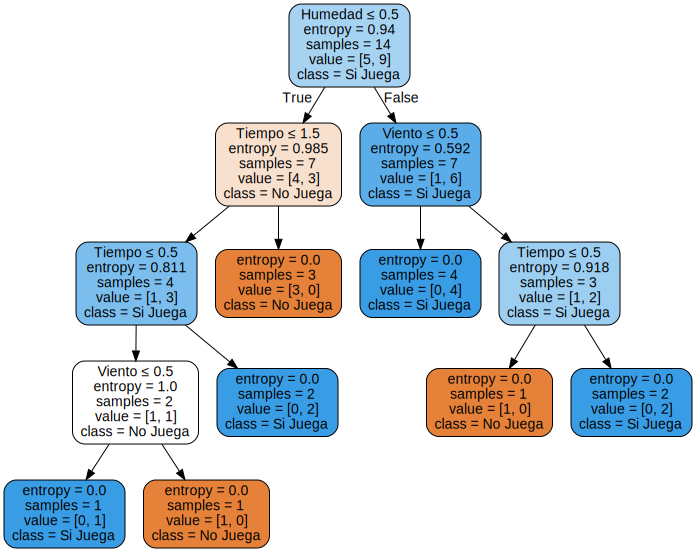

In [151]:
import graphviz
dot_data = tree.export_graphviz(clf_w, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["No Juega", "Si Juega"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Prueba de modelo Automático


In [152]:
weather_test = pd.read_csv("weatherTest.csv",index_col=0)
data_test = pd.DataFrame()

le_w = preprocessing.LabelEncoder()

for v in labelsWeather:
    le_w.fit(weather_test[v])
    data_test[v] = le_w.transform(weather_test[v])
w_test = data_test[data_test.columns[0:4]]
y_pred = clf_w.predict(w_test)
print(y_pred)

[0 0 1 1 1]


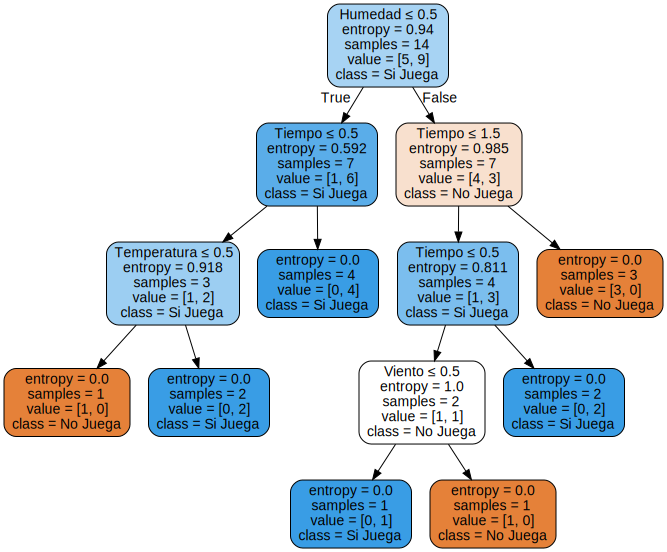

In [153]:
from sklearn import tree

data_weather = weather_data.copy()
data_weather["Tiempo"] = np.where(data_weather["Tiempo"]=="Soleado", 2,
                          np.where(data_weather["Tiempo"]=="Nubloso", 1, 0))
data_weather["Temperatura"] = np.where(data_weather["Temperatura"]=="Alta", 2,
                          np.where(data_weather["Temperatura"]=="Media", 1, 0))
data_weather["Humedad"] = np.where(data_weather["Humedad"] == "Alta",1,0)
data_weather["Viento"] = np.where(data_weather["Viento"] == "Si",1,0)


#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data_weather[data_weather.columns[0:4]]
t_respuesta = data_weather[data_weather.columns[4]]

#crear el modelo
clf = clf.fit(t_data, t_respuesta)

dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["No Juega", "Si Juega"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph



# Test del Modelo

## Sacar la información del csv de pruebas con preprosesamiento manual pandas

In [154]:
weather_test = pd.read_csv("weatherTest.csv",index_col=0)
weather_test["Tiempo"] = np.where(weather_test["Tiempo"]=="Soleado", 2,
                          np.where(weather_test["Tiempo"]=="Nubloso", 1, 0))
weather_test["Temperatura"] = np.where(weather_test["Temperatura"]=="Alta", 2,
                          np.where(weather_test["Temperatura"]=="Media", 1, 0))
weather_test["Humedad"] = np.where(weather_test["Humedad"] == "Alta",1,0)
weather_test["Viento"] = np.where(weather_test["Viento"] == "Si",1,0)

x_test = weather_test[weather_test.columns[0:4]]
#Crear modelo
y_pred = clf.predict(x_test)
y_pred

array(['N', 'N', 'P', 'P', 'P'], dtype=object)

## Datos

In [155]:
t_data

,Tiempo,Temperatura,Humedad,Viento
Ejemplo,,,,
1,2,2,1,0
2,2,2,1,1
3,1,2,1,0
4,0,1,1,0
5,0,1,0,0
6,0,0,0,1
7,1,0,0,1
8,2,1,1,0
9,2,0,0,0


## Resultado datos de entrenamiento

In [156]:
t_respuesta

Ejemplo
1     N
2     N
3     P
4     P
5     P
6     N
7     P
8     N
9     P
10    P
11    P
12    P
13    P
14    N
Name: Juega, dtype: object

## Resultado datos de prueba

In [157]:
y_pred

array(['N', 'N', 'P', 'P', 'P'], dtype=object)